# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [231]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly.  (Check the null values, Data      types, shape, EDA). Perform Univariate and Bivariate Analysis.

### Importing data

In [232]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cubic_zirconia.csv")  

### EDA

In [233]:
# Check top few records to get a feel of the data structure
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Unnamed: 0    26967 non-null int64
carat         26967 non-null float64
cut           26967 non-null object
color         26967 non-null object
clarity       26967 non-null object
depth         26270 non-null float64
table         26967 non-null float64
x             26967 non-null float64
y             26967 non-null float64
z             26967 non-null float64
price         26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [235]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [237]:
df.shape

(26967, 11)

### unique values for categorical variables

In [1538]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




### Checking for duplicates

In [238]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [239]:
df = df.drop('Unnamed: 0', axis=1)

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [240]:
df.loc[(df.loc[:, df.dtypes != object] == 0).any(1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [241]:
#df.drop(df.index[(df.loc[:, df.dtypes != object] == 0).any(1)], inplace=True)
# Replacing zero values with NaN for imputation/deletion later
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)

### Imputing missing values

In [242]:
# Are there any missing values ?
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            3
y            3
z            9
price        0
dtype: int64

In [243]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Univariate Analysis

### Outlier Checks

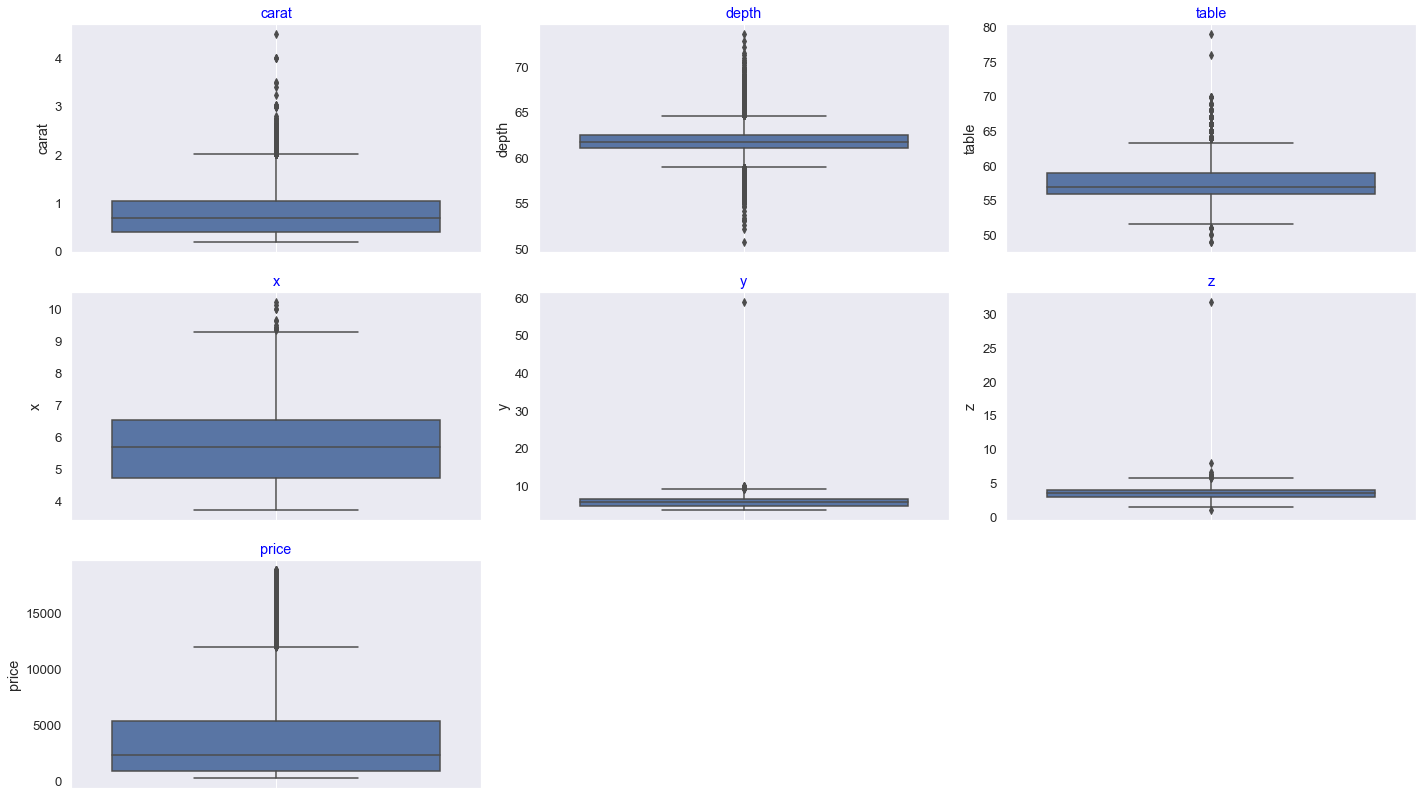

In [244]:
continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[continuous]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

In [245]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [246]:
for feature in df[['carat', 'depth','table','x','y','z','price']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

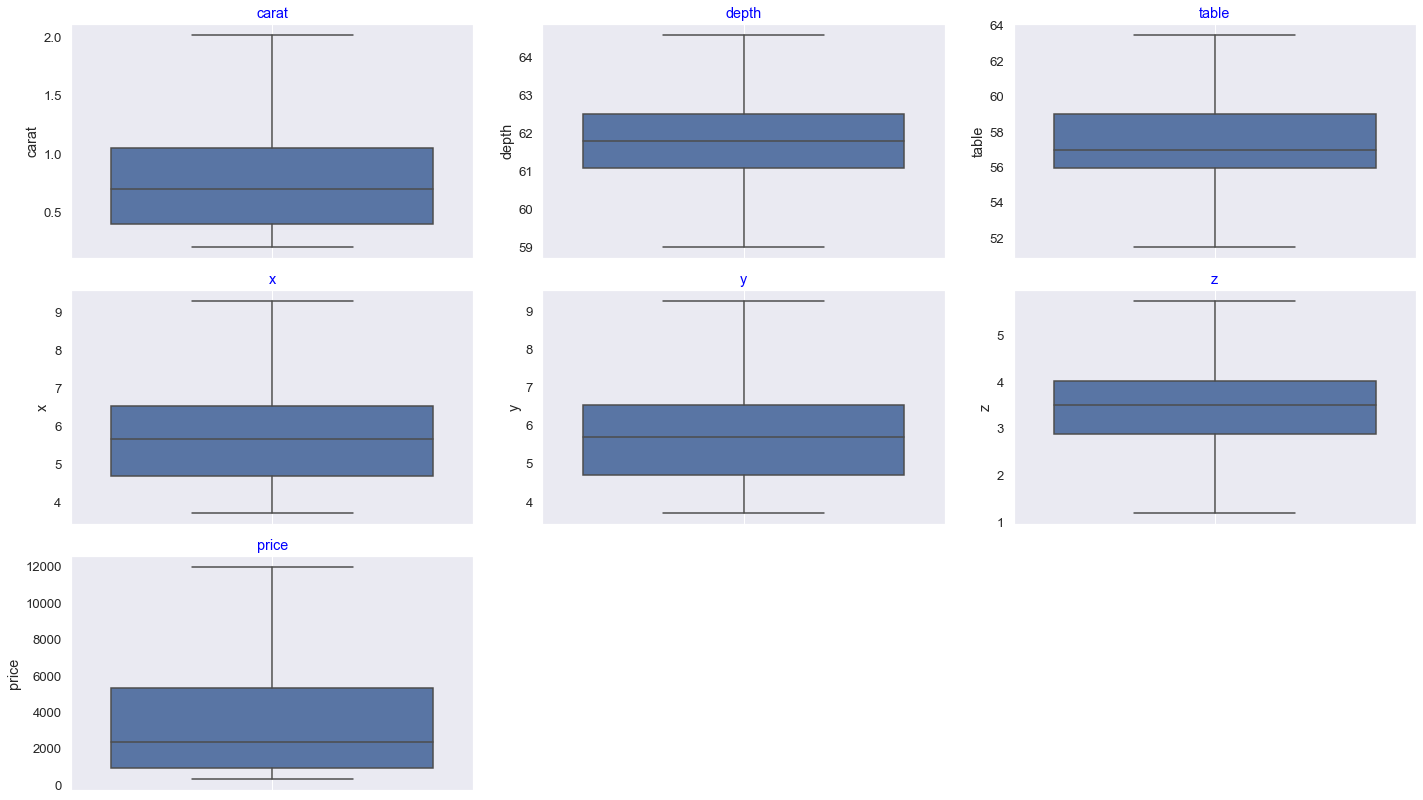

In [247]:
continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[continuous]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

In [248]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26967 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null float64
dtypes: float64(7), object(3)
memory usage: 2.1+ MB


In [250]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.793593,61.749085,57.435699,5.730323,5.732210,3.538045,3737.914136
std,0.462431,1.218903,2.157125,1.126317,1.118243,0.695958,3470.888236
min,0.200000,59.000000,51.500000,3.730000,3.710000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,2.025000,64.600000,63.500000,9.310000,9.270000,5.750000,11982.500000


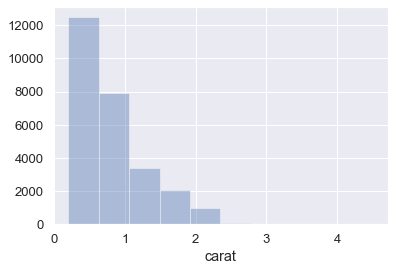

In [1614]:
sns.distplot(df['carat'], kde=False, bins=10);

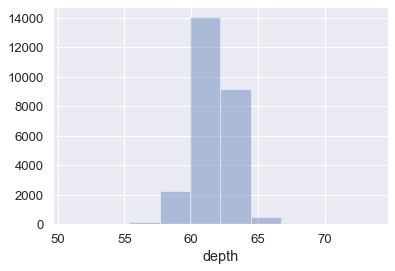

In [1615]:
sns.distplot(df['depth'], kde=False, bins=10);

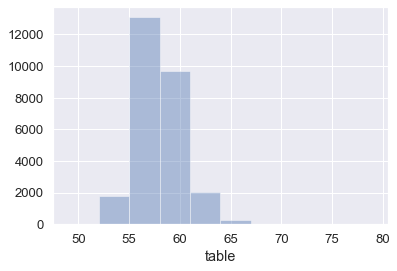

In [1616]:
sns.distplot(df['table'], kde=False, bins=10);

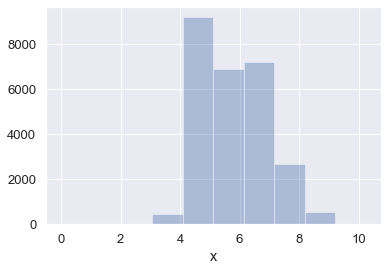

In [1617]:
sns.distplot(df['x'], kde=False, bins=10);

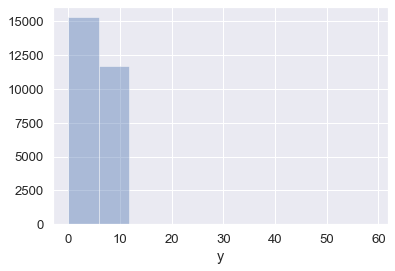

In [1618]:
sns.distplot(df['y'], kde=False, bins=10);

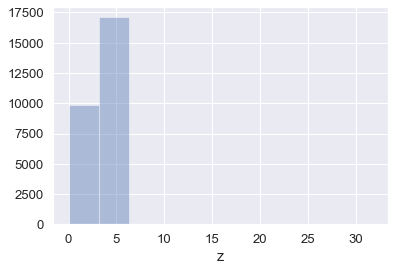

In [1619]:
sns.distplot(df['z'], kde=False, bins=10);

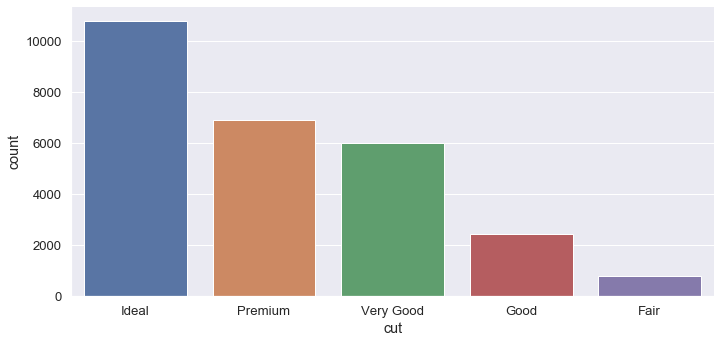

In [1241]:
sns.catplot(x='cut', data=df , kind='count',aspect=2)

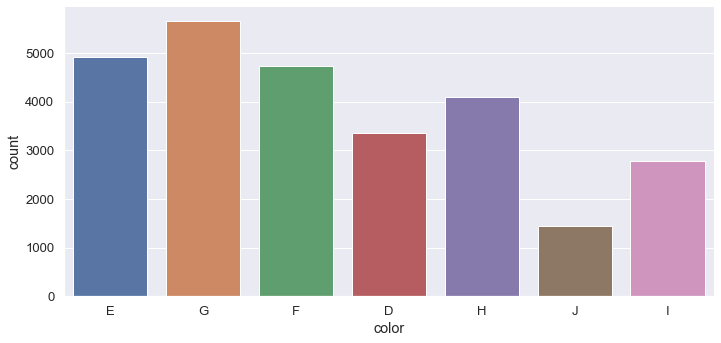

In [1243]:
sns.catplot(x='color', data=df , kind='count',aspect=2)

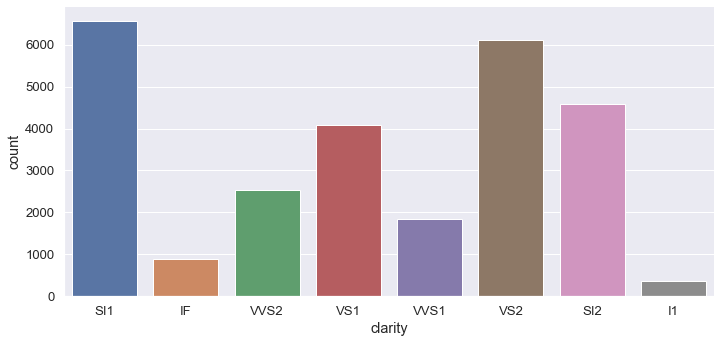

In [1245]:
sns.catplot(x='clarity', data=df , kind='count',aspect=2)

### Bivariate Analysis with Target variable

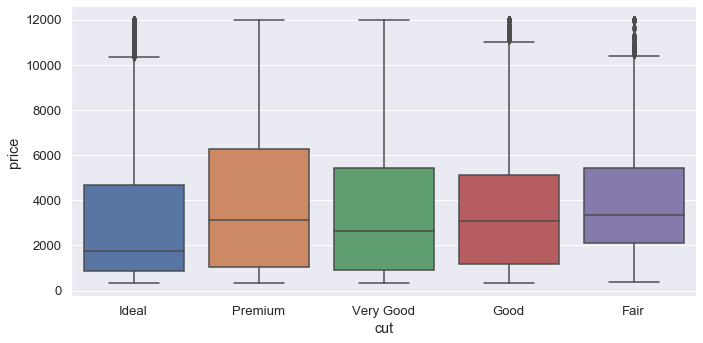

In [1246]:
sns.catplot(x='cut', y='price', data=df, kind='box' ,aspect=2)

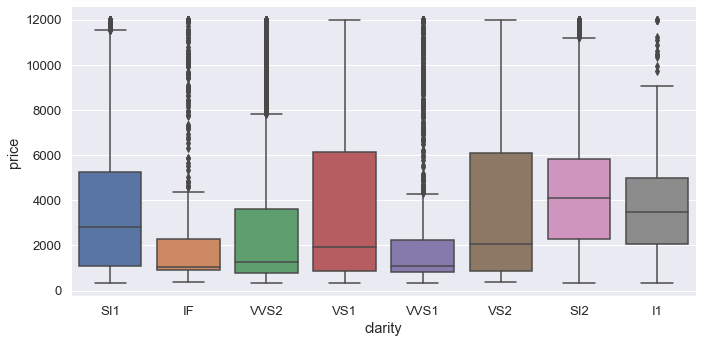

In [1247]:
sns.catplot(x='clarity', y='price', data=df, kind='box' ,aspect=2)

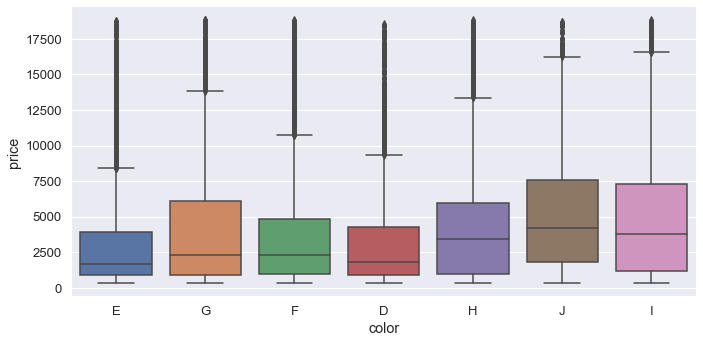

In [1621]:
sns.catplot(x='color', y='price', data=df, kind='box' ,aspect=2)

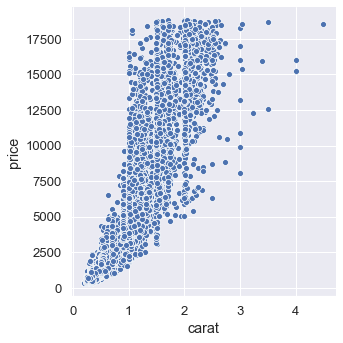

In [225]:
sns.relplot(x="carat", y="price", data=df);

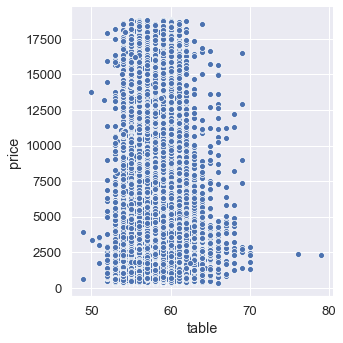

In [226]:
sns.relplot(x="table", y="price", data=df);

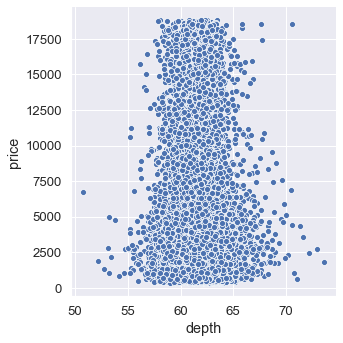

In [227]:
sns.relplot(x="depth", y="price", data=df);

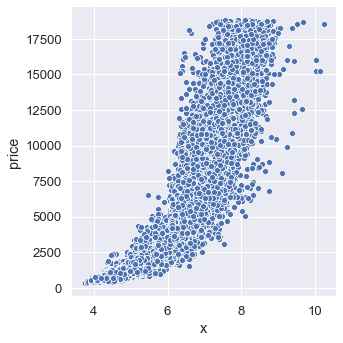

In [228]:
sns.relplot(x="x", y="price", data=df);

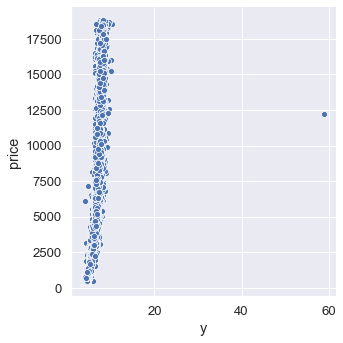

In [229]:
sns.relplot(x="y", y="price", data=df);

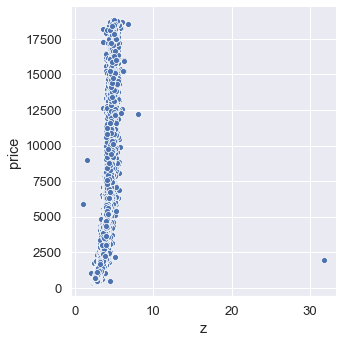

In [230]:
sns.relplot(x="z", y="price", data=df);

### Bivariate Analysis

### Data Distribution

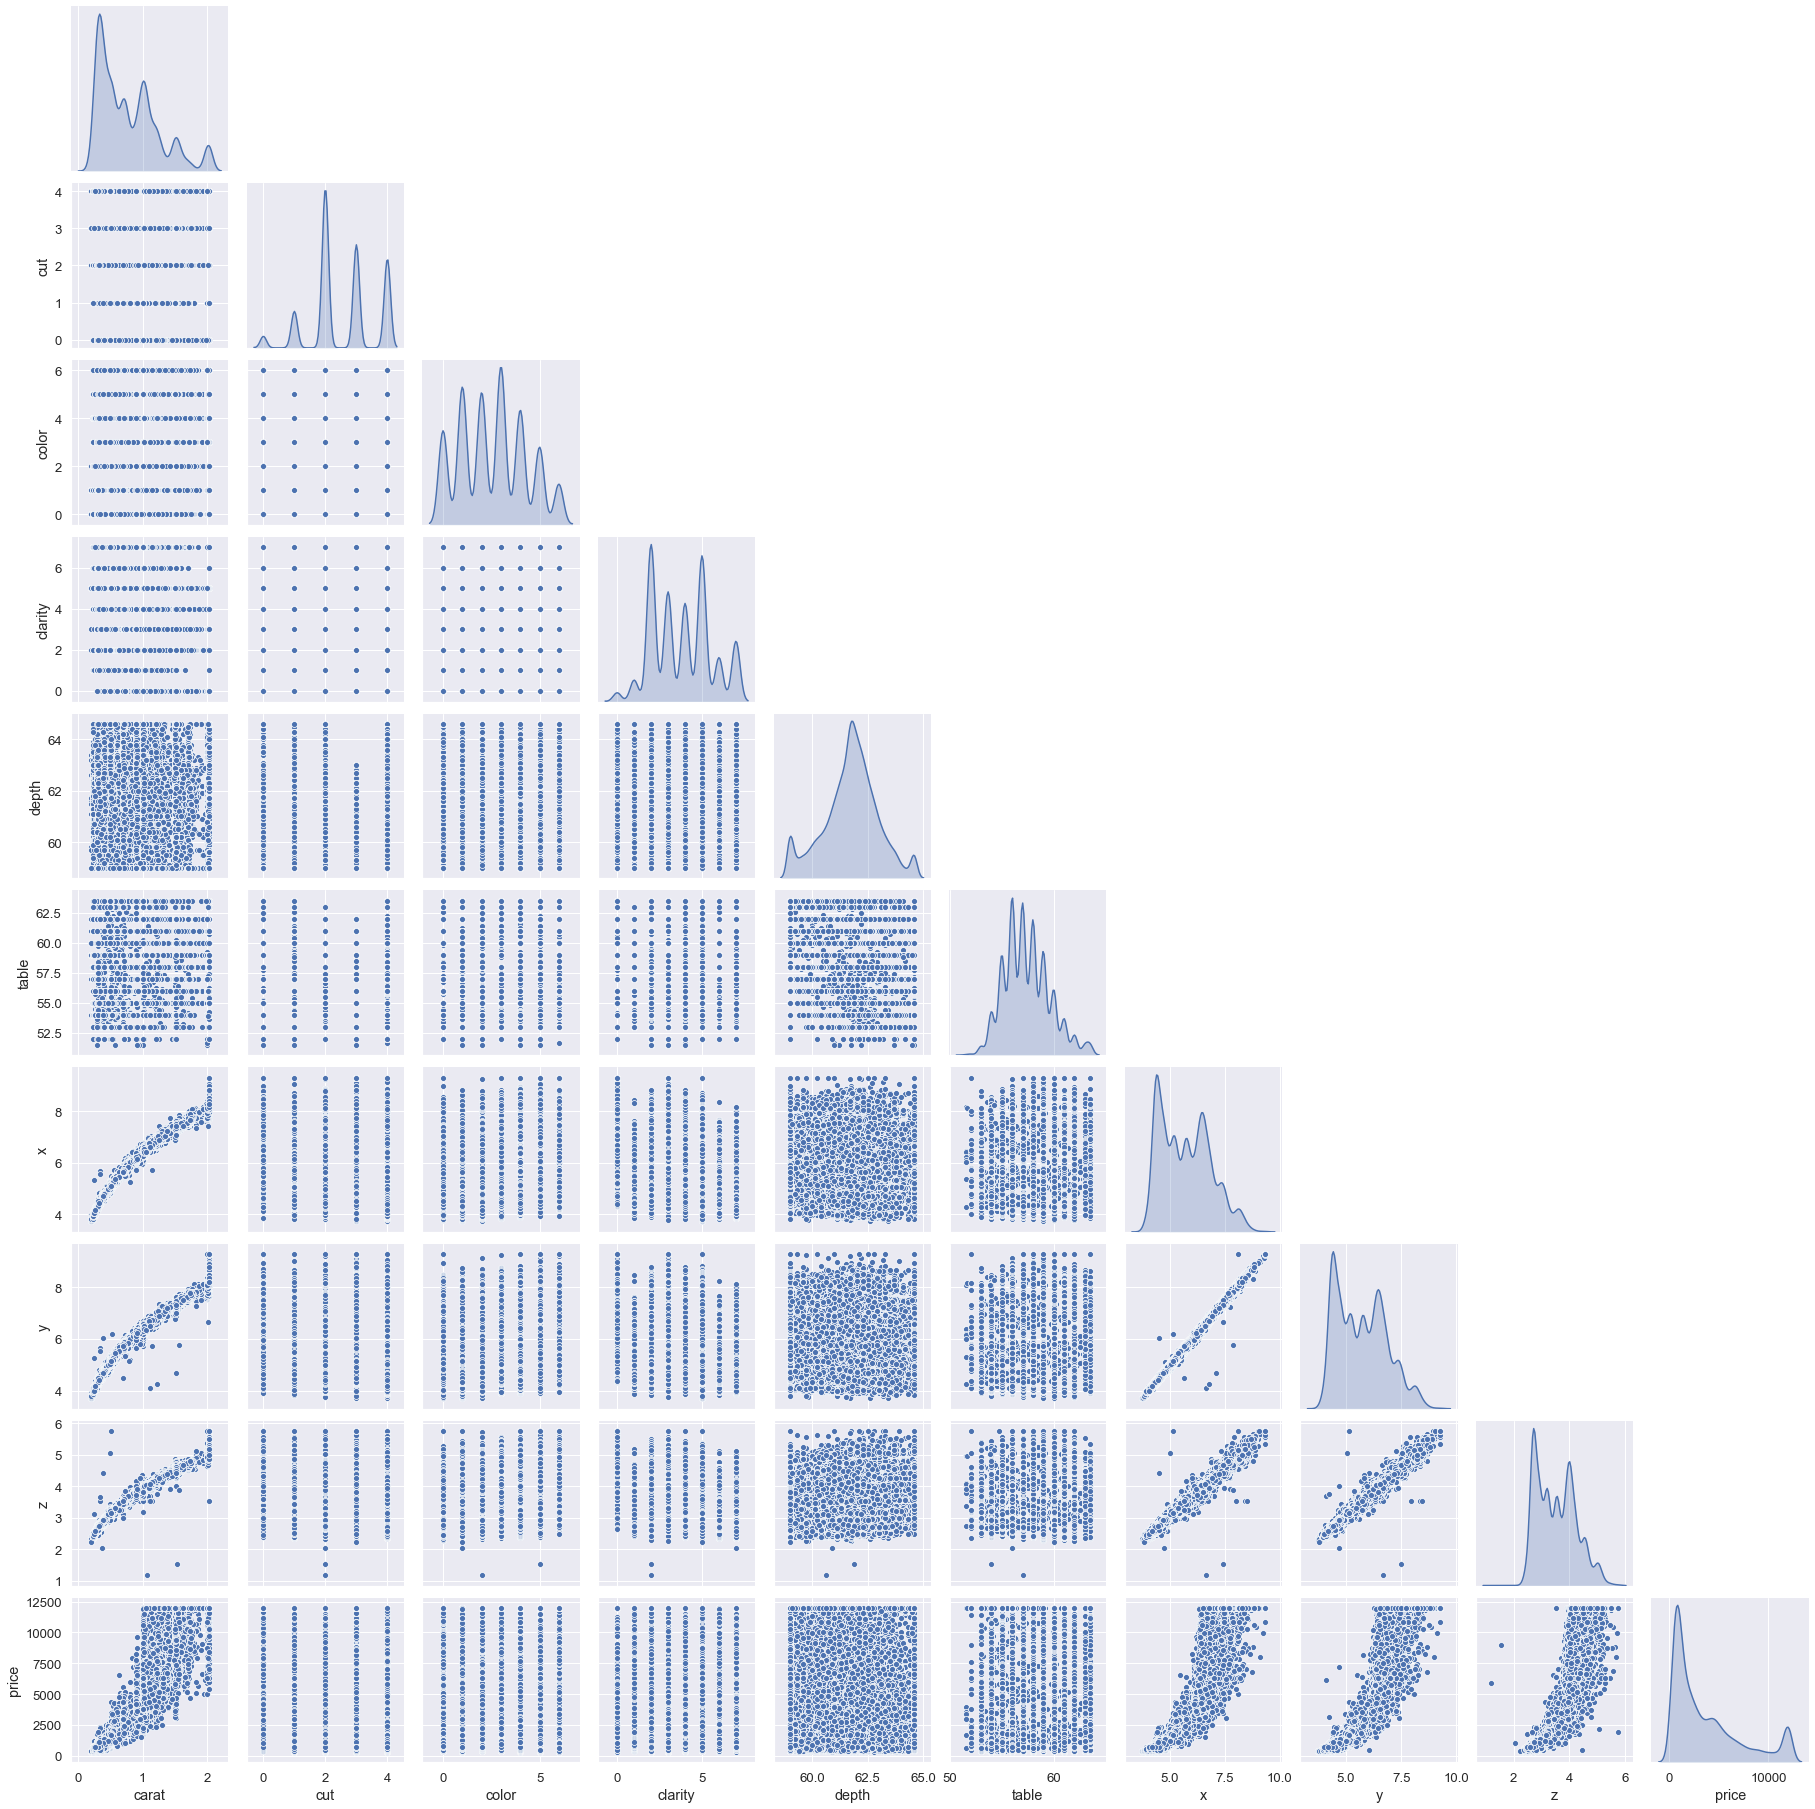

In [1179]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde',corner=True)  
plt.show()

### Correlation Plot

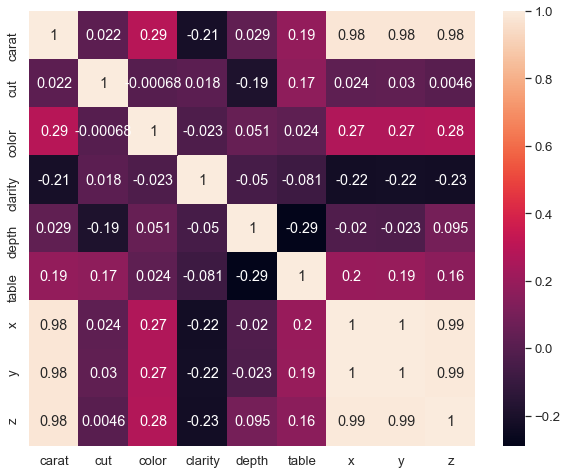

In [1180]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(df.iloc[:, 0:9].corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

### Converting categorical to dummy variables

In [251]:
cleanup = {"cut": {"Ideal": 1, "Premium": 2,"Very Good": 3, "Good": 4,"Fair": 5},
               "clarity" :  {"FL": 1, "IF": 2, "VVS1": 3, "VVS2": 4,"VS1": 5, "VS2": 6, "SI1":7, "SI2": 8,"I1": 9, "I2": 10, "I3":11 }}

df.replace(cleanup, inplace=True)
df['clarity'] = df['clarity'].astype(np.int64)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,E,7,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,G,2,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,3,E,4,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,1,F,5,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,1,F,3,60.4,59.0,4.35,4.43,2.65,779.0


In [252]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes 



feature: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


In [253]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,1,7,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,3,2,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,3,1,4,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,1,2,5,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,1,2,3,60.4,59.0,4.35,4.43,2.65,779.0


In [1251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null int8
color      26967 non-null int8
clarity    26967 non-null int8
depth      26967 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null float64
dtypes: float64(7), int8(3)
memory usage: 1.5 MB


In [1178]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984.0


In [254]:
df['volume'] = df['x'] * df['y'] * df['z'] 

### Train-Test Split

In [255]:
# Copy all the predictor variables into X dataframe
X = df.drop(['price','x','y','z','depth','table','volume'], axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [256]:
X.head()

,carat,cut,color,clarity
0,0.30,1,1,7
1,0.33,2,3,2
2,0.90,3,1,4
3,0.42,1,2,5
4,0.31,1,2,3


In [257]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Linear Regression Model

In [258]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 7941.791077107046
The coefficient for cut is -125.32969183891734
The coefficient for color is -271.9964112218193
The coefficient for clarity is -446.20482257376784


In [260]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1069.022825515452


In [261]:
# R square on training data
regression_model.score(X_train, y_train)

0.9307018334564301

93% of the variation in the price is explained by the predictors in the model for train set

In [262]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9288746623634174

In [263]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

915.6613073164422

In [264]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

920.9373818422929

### With Scaling

In [265]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [266]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [267]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.0555483829878891
The coefficient for cut is -0.04010331245195364
The coefficient for color is -0.1333780066660931
The coefficient for clarity is -0.21030566812815285


In [268]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.4094011461775913e-16


In [269]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train_scaled, y_train_scaled)

0.93070183345643

In [270]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.928906831830398

In [271]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.26324544923620224

In [272]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.2666330215288458

In [273]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

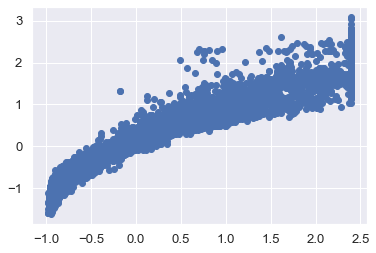

In [274]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [276]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [277]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 5.058509784557525
cut ---> 4.345233636670425
color ---> 3.2329267393411816
clarity ---> 7.307115701762452


### Linear Regression using statsmodels

In [278]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,price
11687,0.41,1,5,4,1061.0
9728,1.71,1,6,7,6320.0
1936,0.33,4,2,7,536.0
26220,0.70,3,4,7,2214.0
18445,0.70,1,0,8,2575.0


In [279]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [280]:
expr= 'price ~ carat + cut + color + clarity'

In [281]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    1069.022826
carat        7941.791077
cut          -125.329692
color        -271.996411
clarity      -446.204823
dtype: float64

In [282]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 6.336e+04
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:58:24   Log-Likelihood:            -1.5551e+05
No. Observations:               18876   AIC:                         3.110e+05
Df Residuals:                   18871   BIC:                         3.111e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1069.0228     28.489     37.525      0.0

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [283]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

838435.6297164599

In [284]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

915.6613073164443

In [285]:
np.sqrt(lm1.mse_resid) #another way

915.7826046327841

In [286]:
# Prediction on Test data
y_pred = lm1.predict(data_test)
y_pred.head()

18031    11475.753795
26051     9143.041388
16279      452.509886
16466      902.627843
19837     6904.173285
dtype: float64

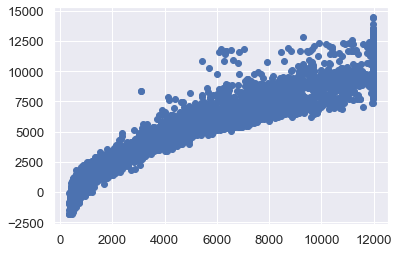

In [287]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [288]:
lm1.params

Intercept    1069.022826
carat        7941.791077
cut          -125.329692
color        -271.996411
clarity      -446.204823
dtype: float64

In [289]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1069.02) * Intercept + (7941.79) * carat + (-125.33) * cut + (-272.0) * color + (-446.2) * clarity + 

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

# Problem 2 : Logistic Regression and LDA

### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [300]:
holiday_data=pd.read_csv("Holiday_Package.csv")

### EDA

In [301]:
holiday_data.head(5)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [302]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
Unnamed: 0           872 non-null int64
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [303]:
holiday_data.shape

(872, 8)

In [304]:
holiday_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [305]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
Unnamed: 0           872 non-null int64
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


### Check for Null Values

In [306]:
holiday_data.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Check for duplicate data

In [307]:
dups = holiday_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [308]:
holiday_data.drop(['Unnamed: 0'], axis = 1,inplace=True)

### Checking for Outliers

Shape before Outliers Treatment (872, 7)


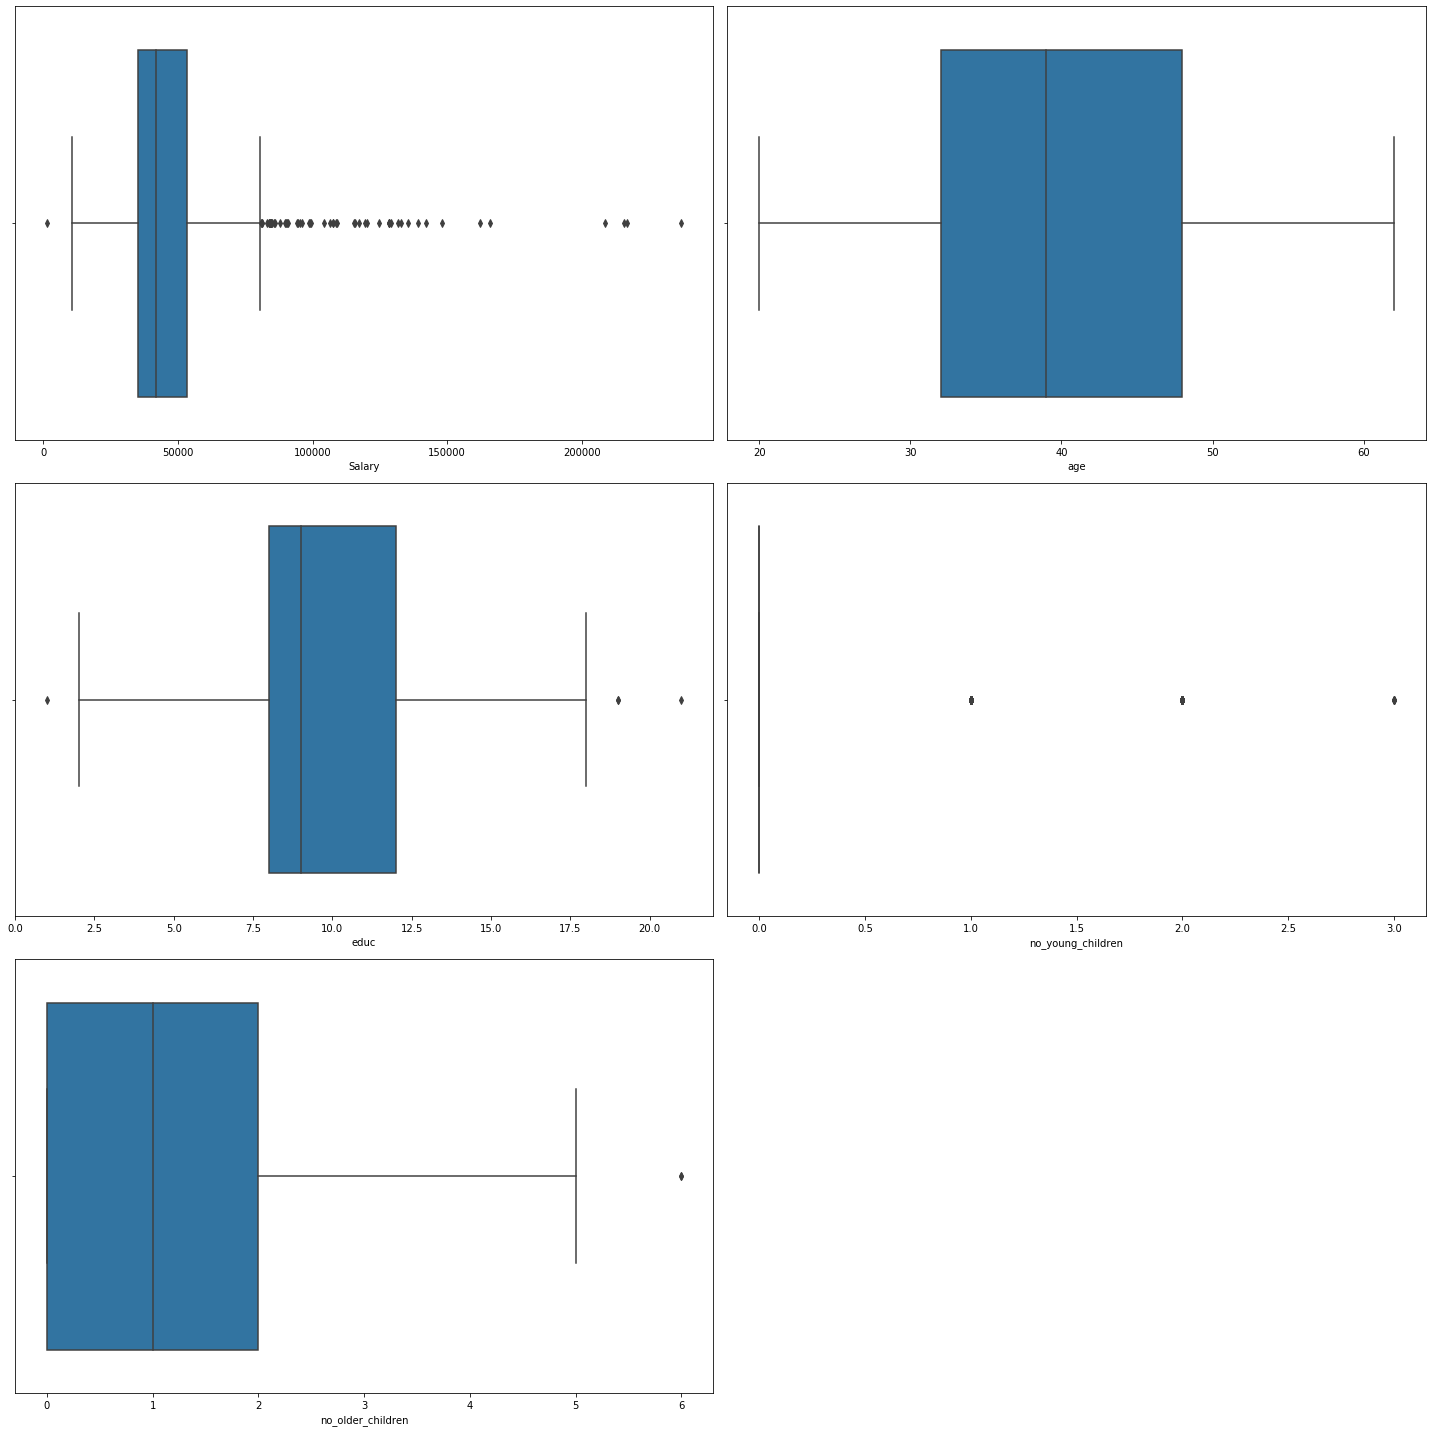

In [14]:
data_plot=holiday_data[['Salary', 'age', 'educ', 'no_young_children','no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',holiday_data.shape)

### Treating Outliers

In [15]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [16]:
for column in holiday_data.columns:
    if holiday_data[column].dtype != 'object' and column in ['educ','Salary']: 
        lr,ur=remove_outlier(holiday_data[column])
        holiday_data[column]=np.where(holiday_data[column]>ur,ur.round(),holiday_data[column])
        holiday_data[column]=np.where(holiday_data[column]<lr,lr.round(),holiday_data[column])

Shape after Outliers Treatment (872, 7)


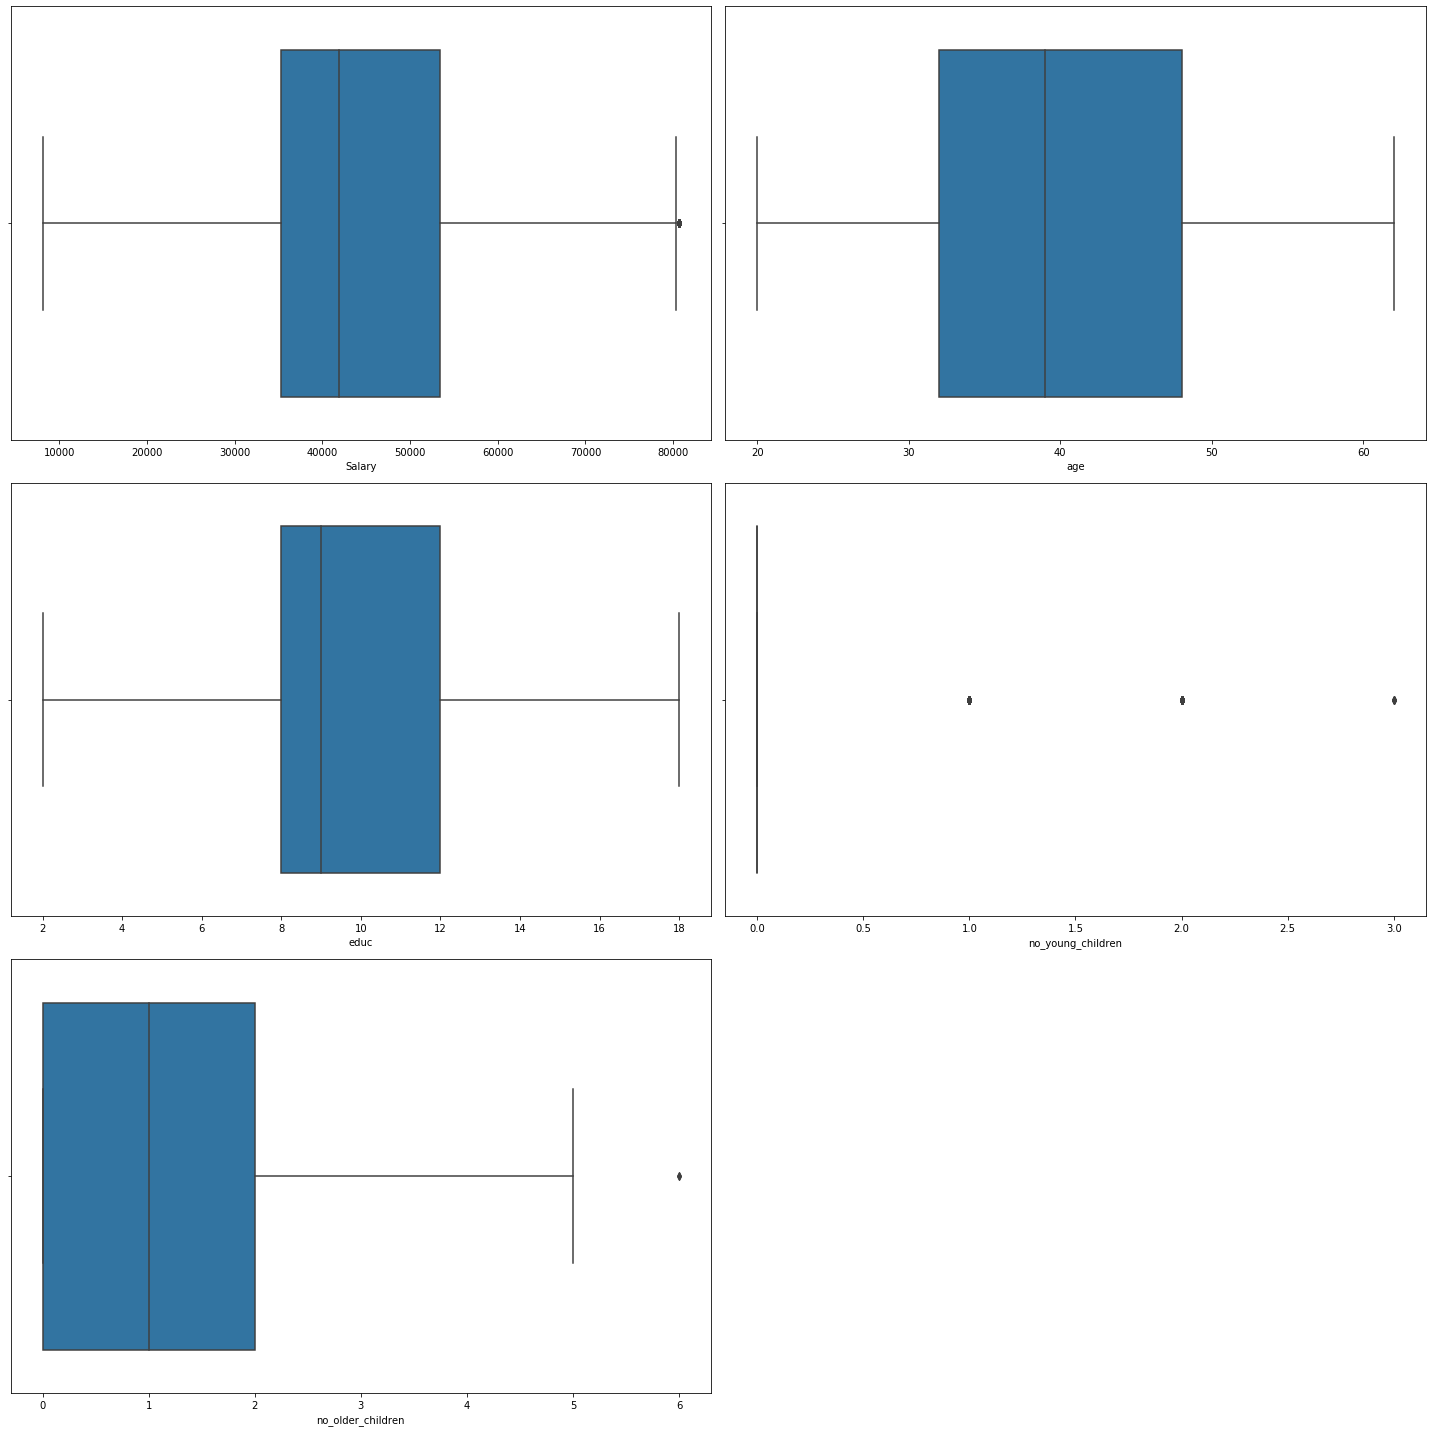

In [17]:
data_plot=holiday_data[['Salary', 'age', 'educ', 'no_young_children','no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',holiday_data.shape)

In [18]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null float64
age                  872 non-null int64
educ                 872 non-null float64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 47.8+ KB


In [19]:
holiday_data.head(2)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30,8.0,1,1,no
1,yes,37207.0,45,8.0,0,1,no


### Proportion in the Target classes

In [20]:
holiday_data.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

### Univariate Analysis

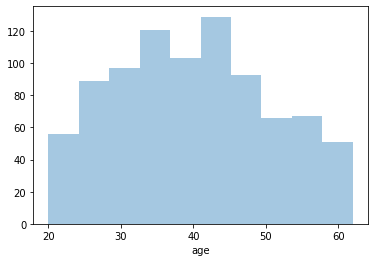

In [21]:
sns.distplot(holiday_data['age'], kde=False, bins=10);

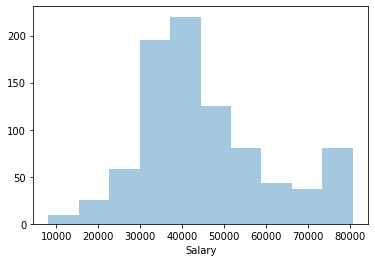

In [22]:
sns.distplot(holiday_data['Salary'], kde=False, bins=10);

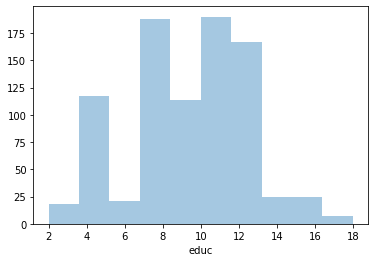

In [23]:
sns.distplot(holiday_data['educ'], kde=False, bins=10);

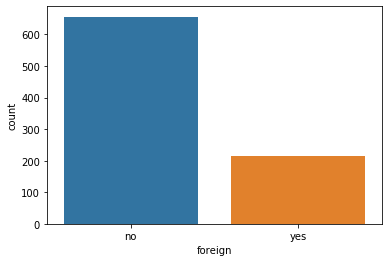

In [24]:
sns.countplot(holiday_data.foreign)

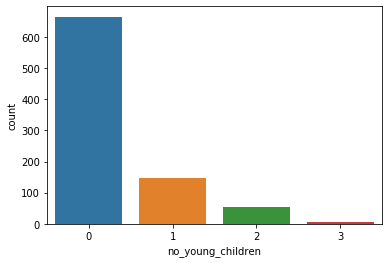

In [25]:
sns.countplot(holiday_data.no_young_children)

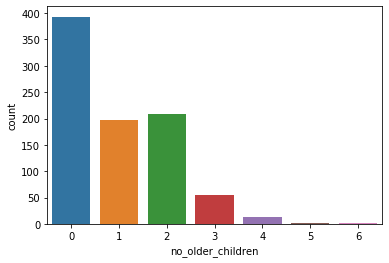

In [26]:
sns.countplot(holiday_data.no_older_children)

### Checking for Correlations

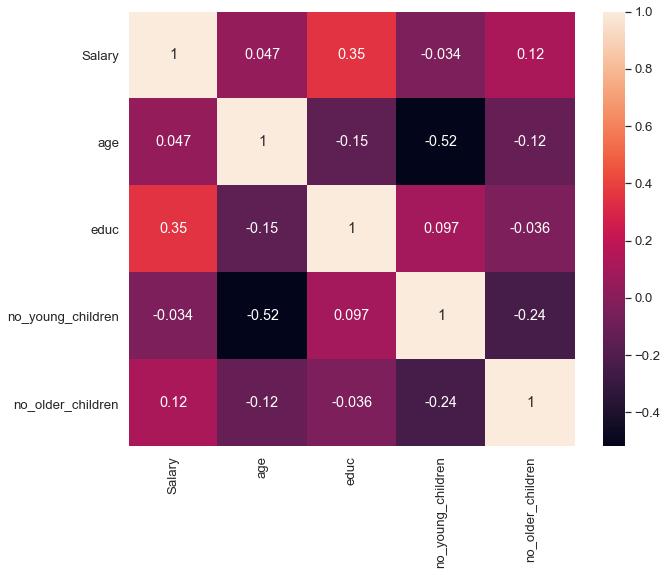

In [27]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(holiday_data.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

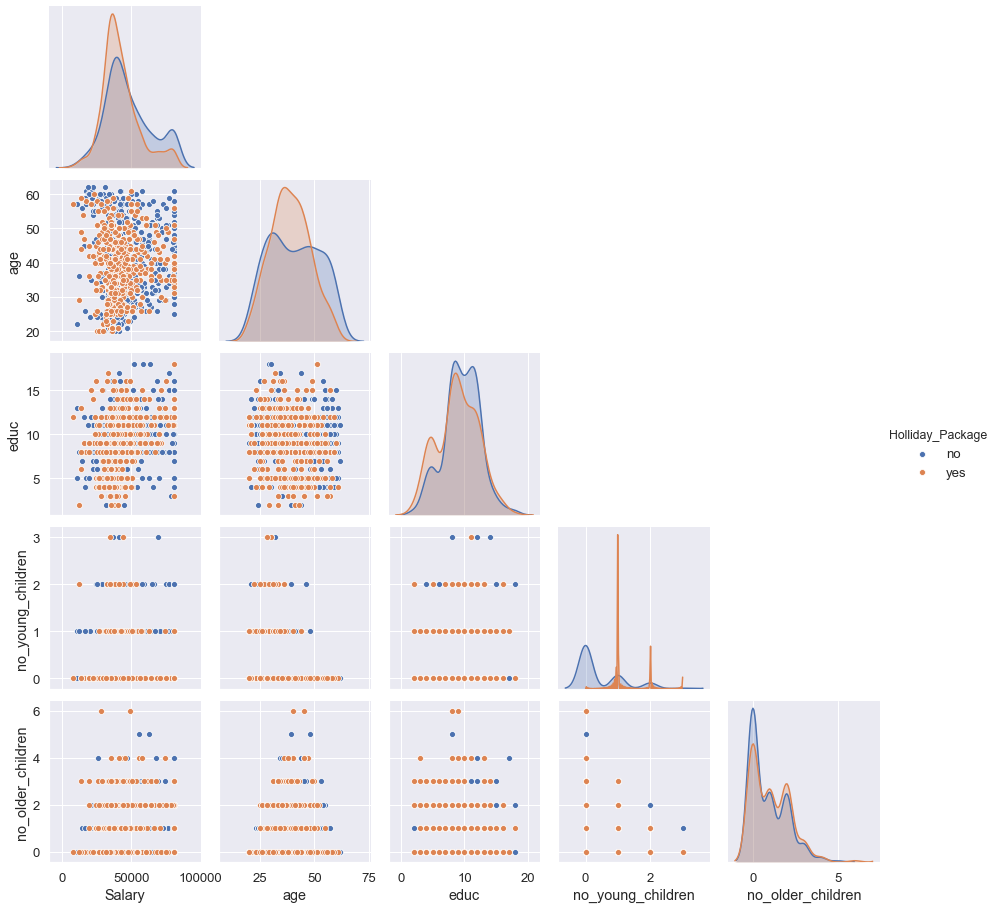

In [28]:
# Pairplot using sns
sns.pairplot(holiday_data , hue='Holliday_Package' , diag_kind = 'kde',corner=True)

### Bi-Variate Analysis with Target variable

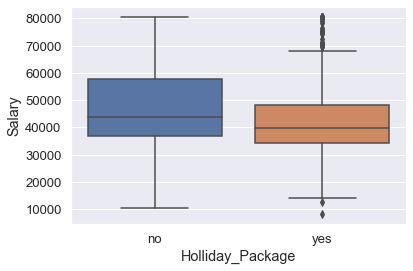

In [29]:
sns.boxplot(holiday_data['Holliday_Package'],holiday_data['Salary'])

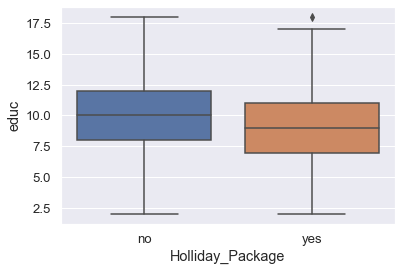

In [30]:
sns.boxplot(holiday_data['Holliday_Package'],holiday_data['educ'])

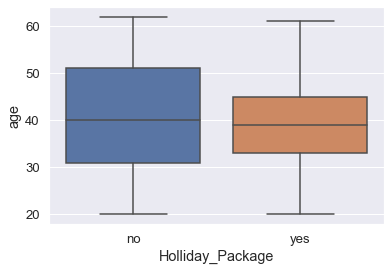

In [31]:
sns.boxplot(holiday_data['Holliday_Package'],holiday_data['age'])

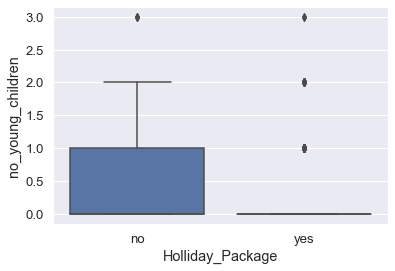

In [32]:
sns.boxplot(holiday_data['Holliday_Package'],holiday_data['no_young_children'])

In [33]:
holiday_data['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [34]:
print(pd.crosstab([holiday_data.Holliday_Package], holiday_data.no_young_children))

no_young_children    0    1   2  3
Holliday_Package                  
no                 326  100  42  3
yes                339   47  13  2


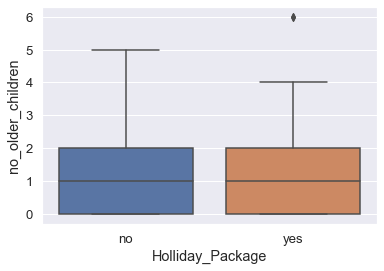

In [35]:
sns.boxplot(holiday_data['Holliday_Package'],holiday_data['no_older_children'])

In [36]:
holiday_data['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

In [37]:
print(pd.crosstab([holiday_data.Holliday_Package], holiday_data.no_older_children))

no_older_children    0    1    2   3  4  5  6
Holliday_Package                             
no                 231  102  102  27  7  2  0
yes                162   96  106  28  7  0  2


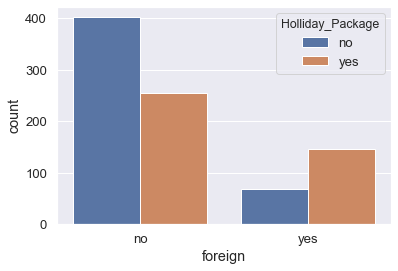

In [38]:
sns.countplot(holiday_data['foreign'],hue=holiday_data['Holliday_Package'])

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Converting all objects to categorical codes

In [309]:
holiday_data['foreign'] = holiday_data['foreign'].map({'yes': 1, 'no': 0})
holiday_data['Holliday_Package'] = holiday_data['Holliday_Package'].map({'yes': 1, 'no': 0})

In [310]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null int64
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null int64
dtypes: int64(7)
memory usage: 47.8 KB


In [311]:
holiday_data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


### Train Test Split

In [367]:
# Copy all the predictor variables into X dataframe
X = holiday_data.drop(['Holliday_Package'], axis=1)

# Copy target into the y dataframe. 
y = holiday_data['Holliday_Package']

In [368]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


In [369]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [370]:
print("Train Independant Data : {}".format(X_train.shape))
print("Train Target Data : {}".format(y_train.shape))
print("Test Independant Data : {}".format(X_test.shape))
print("Test Target Data : {}".format(y_test.shape))

Train Independant Data : (610, 6)
Train Target Data : (610,)
Test Independant Data : (262, 6)
Test Target Data : (262,)


### Logistic Regression Model

In [371]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression(random_state = 1)

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2","l1"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,110],
              "C" :[100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, scoring="accuracy", n_jobs= 2, verbose = 1)

In [372]:
# Fit the Logistic Regression model
#lr_model = LogisticRegression(solver='liblinear',max_iter=100,verbose=True,n_jobs=1)
#model = LogisticRegression()
gsLRM.fit(X_train, y_train)
lr_model = gsLRM.best_estimator_

C:\Users\Nimish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[LibLinear]

[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:    1.3s finished


### Predicting on Training and Test dataset

In [373]:
lr_ytrain_predict = lr_model.predict(X_train)
lr_ytest_predict = lr_model.predict(X_test)

### Getting the Predicted Classes and Probs

In [374]:
lr_ytest_predict_prob=lr_model.predict_proba(X_test)
pd.DataFrame(lr_ytest_predict_prob).head()

,0,1
0,0.760366,0.239634
1,0.273408,0.726592
2,0.902685,0.097315
3,0.977954,0.022046
4,0.512143,0.487857


In [375]:
print(lr_model.coef_, lr_model.intercept_)

[[-1.74638092e-05 -5.44690078e-02  7.87014555e-02 -1.54437307e+00
  -5.58346139e-02  1.58969743e+00]] [2.24861761]


In [376]:
X.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'foreign'],
      dtype='object')

2.26 * intercept + (-1.74638092e-05) * Salary + (-5.44690078e-02) * age + (7.87014555e-02) * educ
                + (-1.54437307e+00) * no_young_children + (-5.58346139e-02) * no_older_children + (1.58969743e+00) * foreign 

### Linear Discriminant Analysis Model

In [377]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd","lsqr", "eigen"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDM = GridSearchCV(LDA, param_grid = lda_param_grid,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

In [378]:
gsLDM.fit(X,y)
lda_model = gsLDM.best_estimator_
lda_model

C:\Users\Nimish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  27 out of  27 | elapsed:    0.1s finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Predicting on Training and Test dataset

In [379]:
lda_ytrain_predict = lda_model.predict(X_train)
lda_ytest_predict = lda_model.predict(X_test)

### Getting the Predicted Classes and Probs

In [380]:
lda_ytest_predict_prob=lda_model.predict_proba(X_test)
pd.DataFrame(lda_ytest_predict_prob).head()

,0,1
0,0.748461,0.251539
1,0.291414,0.708586
2,0.854011,0.145989
3,0.961223,0.038777
4,0.487251,0.512749


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Model Evaluation : Logistic Regression

In [381]:
# Accuracy - Training Data
lr_train_acc = lr_model.score(X_train, y_train)
lr_train_acc

0.6786885245901639

### AUC and ROC for the training data

AUC: 0.743


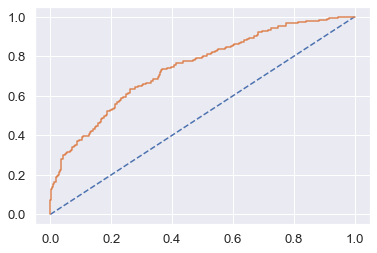

In [382]:
# predict probabilities
lr_train_probs = lr_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_train_probs = lr_train_probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, lr_train_probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, lr_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)

### AUC and ROC for the test data

AUC: 0.705


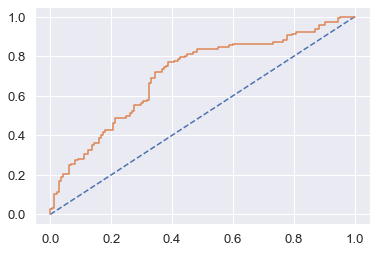

In [383]:
# predict probabilities
lr_test_probs = lr_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_test_probs = lr_test_probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, lr_test_probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, lr_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

### Confusion Matrix for the training data

In [384]:
confusion_matrix(y_train, lr_ytrain_predict)

array([[252,  74],
       [122, 162]], dtype=int64)

In [385]:
lr_train_metrics=classification_report(y_train, lr_ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_train_metrics).transpose()
lr_train_precision=round(df.loc["1"][1],2)
lr_train_recall=round(df.loc["1"][2],2)
lr_train_f1=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.57
lr_train_recall  0.62
lr_train_f1  0.69


### Confusion Matrix for test data

In [164]:
cnf_matrix=confusion_matrix(y_test, lr_ytest_predict)
cnf_matrix

array([[102,  43],
       [ 52,  65]], dtype=int64)

In [165]:
#Test Data Accuracy
lr_test_acc=lr_model.score(X_test,y_test)
lr_test_acc

0.6374045801526718

In [166]:
lr_test_metrics=classification_report(y_test, lr_ytest_predict,output_dict=True)
df=pd.DataFrame(lr_test_metrics).transpose()
lr_test_precision=round(df.loc["1"][1],2)
lr_test_recall=round(df.loc["1"][2],2)
lr_test_f1=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.56
lr_test_recall  0.58
lr_test_f1  0.6


### Checking the multicollinerity on the features

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [169]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

Salary ---> 10.913926442174
age ---> 8.926975788575458
educ ---> 10.565957069024073
no_young_children ---> 1.5548859253579774
no_older_children ---> 1.9249693206937246
foreign ---> 1.4287641275221226


### Model Evaluation : LDA

In [189]:
# Accuracy - Training Data
lda_train_acc = lda_model.score(X_train, y_train)
lda_train_acc

0.6754098360655738

### AUC and ROC for the training data

AUC: 0.735


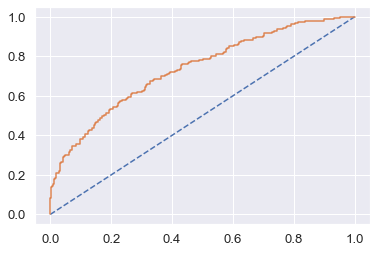

In [172]:
# predict probabilities
lda_train_probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lda_train_probs = lda_train_probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, lda_train_probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, lda_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

### AUC and ROC for the test data

AUC: 0.709


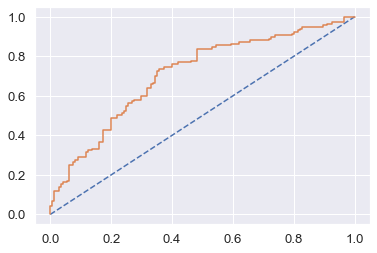

In [173]:
# predict probabilities
lda_test_probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_test_probs = lda_test_probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, lda_test_probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, lda_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

### Confusion Matrix for the training data

In [174]:
confusion_matrix(y_train, lda_ytrain_predict)

array([[258,  68],
       [130, 154]], dtype=int64)

In [175]:
lda_train_metrics=classification_report(y_train, lda_ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_train_metrics).transpose()
lda_train_precision=round(df.loc["1"][1],2)
lda_train_recall=round(df.loc["1"][2],2)
lda_train_f1=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.54
lda_train_recall  0.61
lda_train_f1  0.69


### Confusion Matrix for test data

In [176]:
cnf_matrix=confusion_matrix(y_test, lda_ytest_predict)
cnf_matrix

array([[105,  40],
       [ 49,  68]], dtype=int64)

In [177]:
#Test Data Accuracy
lda_test_acc=lda_model.score(X_test,y_test)
lda_test_acc

0.6603053435114504

In [178]:
lda_test_metrics=classification_report(y_test, lda_ytest_predict,output_dict=True)
df=pd.DataFrame(lda_test_metrics).transpose()
lda_test_precision=round(df.loc["1"][1],2)
lda_test_recall=round(df.loc["1"][2],2)
lda_test_f1=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.58
lda_test_recall  0.6
lda_test_f1  0.63


### Final Model: Compare Both the models and write inference which model is best/optimized.

In [180]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.68,0.64,0.68,0.66
AUC,0.74,0.70,0.74,0.71
Recall,0.62,0.58,0.61,0.60
Precision,0.57,0.56,0.54,0.58
F1 Score,0.69,0.60,0.69,0.63


### ROC Curve for the 2 models on the Training data

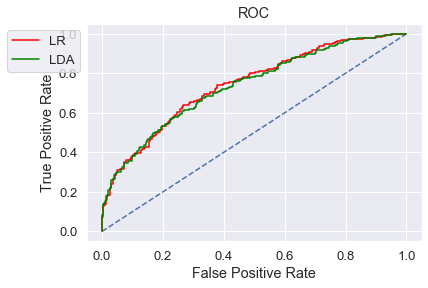

In [181]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### ROC Curve for the 2 models on the Test data

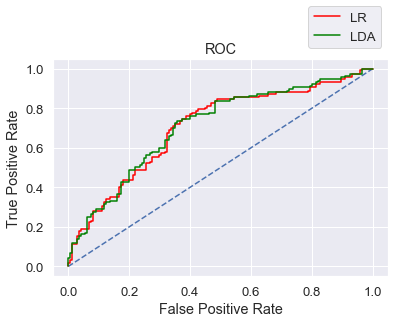

In [182]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.